Epoch 1/100


f:\PythonL\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.4060
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.3988
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3917
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.3845
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3774
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.3703
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3631
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3560
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.3489
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.3417
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.3346
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3276
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3206
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.3136
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.3067
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━

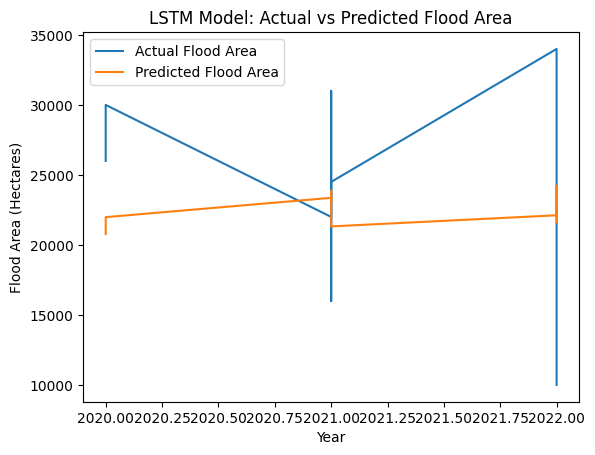

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

path = r"F:\PythonL\Data\Bihar_Flood_Data.xlsx"
data = pd.read_excel(path)


data = data.sort_values("Year")


values = data["Flood_Area_Ha"].values.reshape(-1,1)



scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(values)

# Create Sequences

sequence_length = 3

X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

# Build LSTM Model

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X, y, epochs=100, verbose=1)

predictions = model.predict(X)

predictions_original = scaler.inverse_transform(predictions)
actual_original = scaler.inverse_transform(y)


years = data["Year"].values[sequence_length:]

plt.figure()
plt.plot(years, actual_original, label="Actual Flood Area")
plt.plot(years, predictions_original, label="Predicted Flood Area")

plt.xlabel("Year")
plt.ylabel("Flood Area (Hectares)")
plt.title("LSTM Model: Actual vs Predicted Flood Area")
plt.legend()

plt.show()